# Principles of Machine Learning AE2

## Section A

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

### Decision Trees and Random Forests

#### 1. Use SciKit-Learn to load a dataset of your choosing.

SciKit-Learn contains 'Toy datasets'. These small datasets are usually used for testing or learning purposes as they are often too small for machine learning algorithms to make accurate transferable predictions on their data. One of these datasets is the breast cancer wisconsin dataset, a corpus of numerical data that can be used for binary classification tasks.

For this report we will be using the breast cancer dataset and loading it via SciKit-Learn.

In [5]:
# Load the breast cancer dataset as a BUNCH
breast_cancer = load_breast_cancer()

# Convert the data to a pandas dataframe
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
data['target'] = breast_cancer.target

data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [6]:
# Shows split of clases
data.target.value_counts()

1    357
0    212
Name: target, dtype: int64

The breast cancer dataset contains information on 569 breast masses each with 30 numerical features recorded and a classification of benign (0) or malignant (1). The data is not quite evenly split, with 357 masses being malignant and 212 being benign.

#### 2. Use a decision tree classifier to identify decision boundaries in the dataset.

Before I can train a Decision Tree Classifier model, I must first split the data into train and test sets.

In [7]:
# Splits data into train and test
X = data.drop(['target'], 1)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

<ipython-input-7-db102c8b9b45>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop(['target'], 1)


Below I display the decision tree generated by the DecisionTreeClassifier. I have opted to use 'entropy' as the criterion for my baseline Decision Tree since this algorithm is used in the ID3 and C4.5 algorithms as opposed to CART.

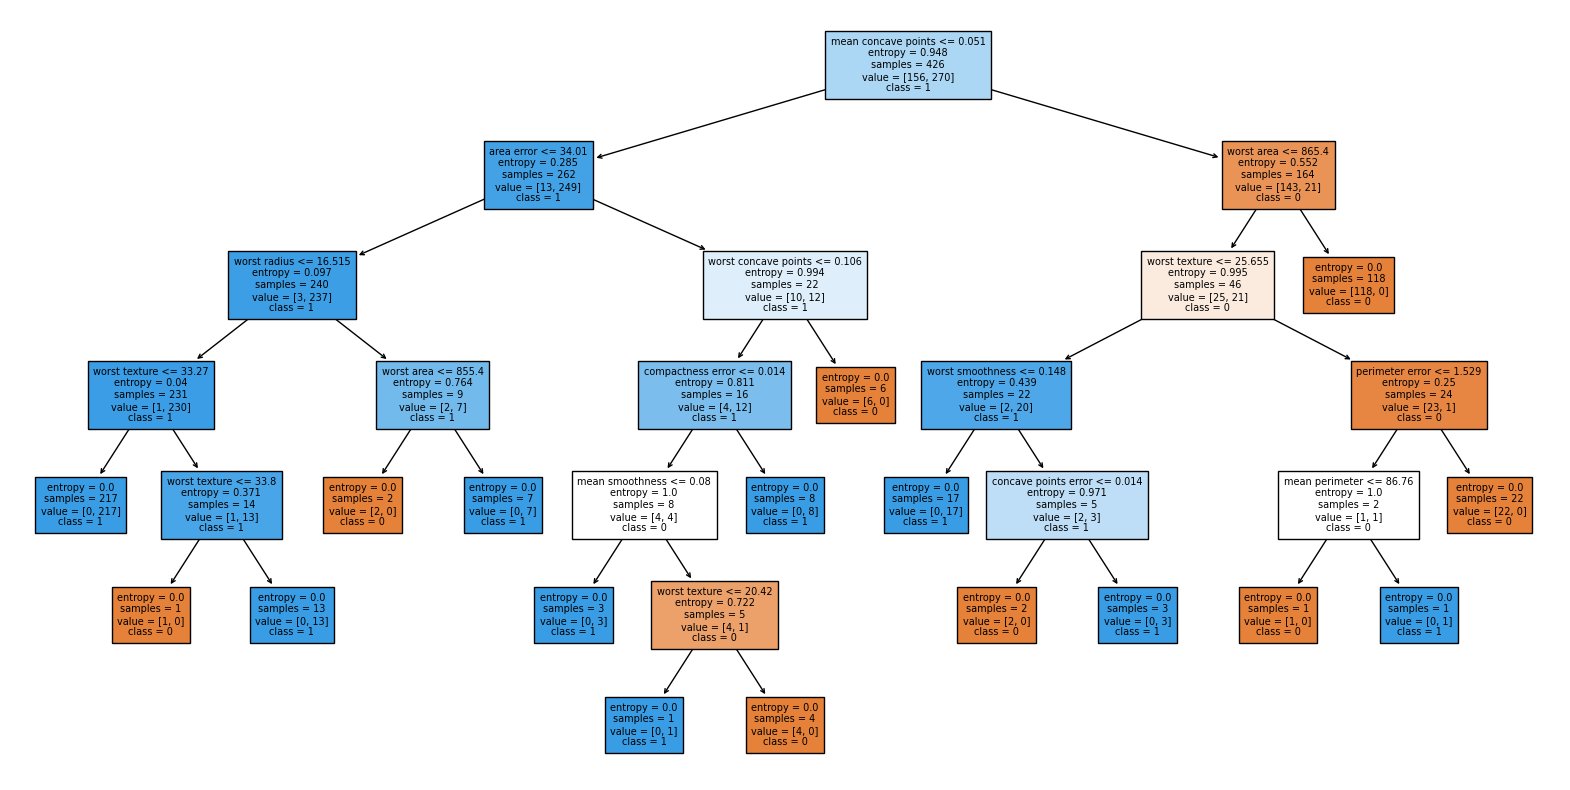

In [406]:
# Trains DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

# Plots decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, class_names=['0','1'], feature_names=X_train.columns, fontsize=7)
plt.show()

I have also plotted the decision boundary. For the sake of this visualisation I have only identified the decision boundary for two features, 'mean radius' and 'mean texture'. However, for my actual DecisionTreeClassifier I have used all 30 features as input features into the algorithm.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


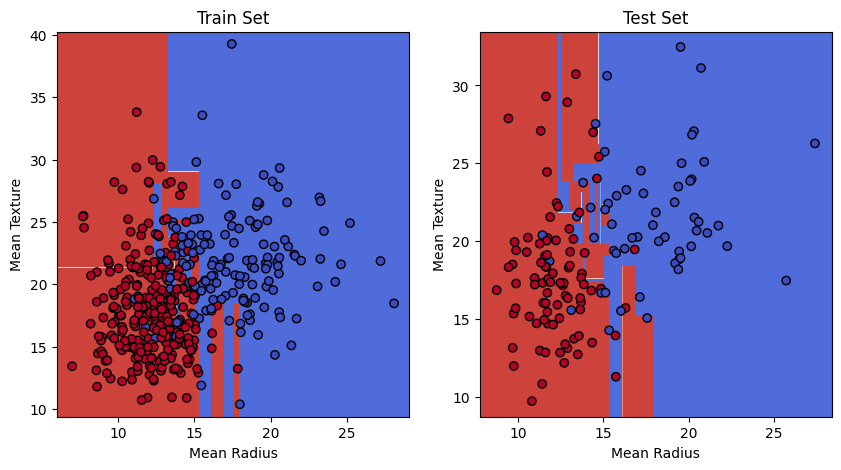

In [267]:
# Plots decision boundary in 2D space

def plot_boundary(clf, ax, data_x, data_y):
  f1_min, f1_max = data_x['mean radius'].min() - 1, data_x['mean radius'].max() + 1
  f2_min, f2_max = data_x['mean texture'].min() - 1, data_x['mean texture'].max() + 1

  xx, yy = np.meshgrid(np.arange(f1_min, f1_max, 0.02), np.arange(f2_min, f2_max, 0.02))

  clf.fit(X_train[['mean radius', 'mean texture']], y_train)
  Z = clf.predict(np.c_[xx.reshape(-1), yy.reshape(-1)]).reshape(xx.shape)
  ax.contourf(xx, yy, Z, cmap='coolwarm')
  ax.scatter(data_x['mean radius'], data_x['mean texture'], c=data_y, cmap='coolwarm', edgecolors='black')
  ax.set_xlabel('Mean Radius')
  ax.set_ylabel('Mean Texture');

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plot_boundary(clf, ax1, X_train, y_train)
ax1.set_title('Train Set')
ax2.set_title('Test Set')
plot_boundary(clf, ax2, X_test, y_test)

#### 3. Alter the breadth and depth of the decision tree and assess the best dimensions for your tree which gives the most accurate predictions. Use cross-validation to minimise the validation error.


Decision trees with large dimensions have a tendancy to overfit to the training data, hence depth and breadth are important hyper-paramters to considering during tuning. It is possible to limit the depth of the decision tree via the 'max_depth' hyper-parameter and the breadth of the tree with 'max_leaf_nodes'.

I have determined the best dimensions by performing a Grid Search with cross-validation in which `cv=10`.

In [44]:
# Grid search for hyper-parameter tuning
grid = GridSearchCV(DecisionTreeClassifier(),
                    {'criterion':['entropy'], 'max_leaf_nodes':[num for num in range(2,15)], 'max_depth':[num for num in range(1, 15)]},
                    cv=10)

grid.fit(X_train,y_train).best_params_

{'criterion': 'entropy', 'max_depth': 13, 'max_leaf_nodes': 5}

In [45]:
# Train classifier with best hyperparameters
clf = DecisionTreeClassifier(criterion='entropy', max_depth=13, max_leaf_nodes=5)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9370629370629371

The best hyperparameters were determined to be `max_depth=13` and `max_leaf_nodes=5` whilst still using the entropy criterion. This produced a test accuracy of 93.7%.

#### 4. Use the CART algorithms to optimise the shape of your decision tree.


The CART algorithm is an algorithm that responds to the whether the target is categorical or numerical when creating decision trees. It can be used to optimise the shape of a decision tree as it will stop growing when it determines that no further gain is possible. The CART algorithm allows for pruning, which simplifies the tree after its formation, which can help reduce the dimensions of the tree and mitigate issues caused by overfitting.

SciKit-Learn uses a version of the CART algorithm despite that it is not currently possible to make categorical classifications using the DecisionTreeClassifier. Gini, as opposed to entropy uses the CART algorithm. As 'gini' is the default criterion parameter it need not be specified in the Grid Search below.

In [71]:
# Determine the best dimensions for the tree using gini

grid = GridSearchCV(DecisionTreeClassifier(),
                    {'max_leaf_nodes':[num for num in range(2,15)], 'max_depth':[num for num in range(1, 15)]},
                    cv=5)

grid.fit(X_train,y_train).best_params_

{'max_depth': 9, 'max_leaf_nodes': 11}

In [418]:
# Trains the Classifier using the best values and CART algorithm
clf = DecisionTreeClassifier(criterion='gini', max_depth=9, max_leaf_nodes=11)
clf.fit(X_train, y_train)

tree_train = clf.score(X_train, y_train)
tree_test = clf.score(X_test, y_test)

tree_test

0.9440559440559441

By using the CART algorithm with the most appropriate depth and breadth (in this case, 9 and 11 respectively), a small improvement in accuracy is shown - from 93.7% with Entropy to 94.4% with Gini Impurity.

#### 5. Why is a decision tree a non-parametric model? What would be an example of a parametric model?

A non-parametric model is a model with a potentially infinite number of parameters. As the tree gets wider and deeper the the number of parameters and the complexity of the model grows infinitely as the number of nodes grows infinitely. Parametric models on the other hand have a limited number of parameters. For example, in a Linear Regression model there is a finite number of weight parameters that are updated.

The shape of the decision tree is purely dependent on the training data and does not have any predefined coefficients or parameters. As the data grows, so does the tree, with more partitions happening and more nodes being created. As the size of the decision tree parallels the size of the data and the data could be infinitely large - so could the decision tree. This is why it is often important to limit the breadth or depth of a tree or to use the CART algorithm so that the decision tree does not continue to divide and grow to an arbitrarily large size to match the intricacies of a particular dataset without much reduction in loss.



#### 6. Use your decision tree as a predictor of data values that may not be in your dataset.

We can use our model to predict the values of `X_test` the set of features in our test dataset.

In [189]:
# Make predictions
predictions = clf.predict(X_test)

report = classification_report(y_test, predictions)
print('Classification report for {}: \n'.format(clf))
print(report)

Classification report for DecisionTreeClassifier(max_depth=9, max_leaf_nodes=11): 

              precision    recall  f1-score   support

           0       0.96      0.89      0.93        56
           1       0.93      0.98      0.96        87

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143



The model is more precise when predicting benign (0) masses than malignant (1) ones. In a medical situation this may not be ideal as it would be more beneficial to predict more false positives than false negatives. We can see the number of false positives, negatives and true positives, negatives in the confusion matrix visualised below.

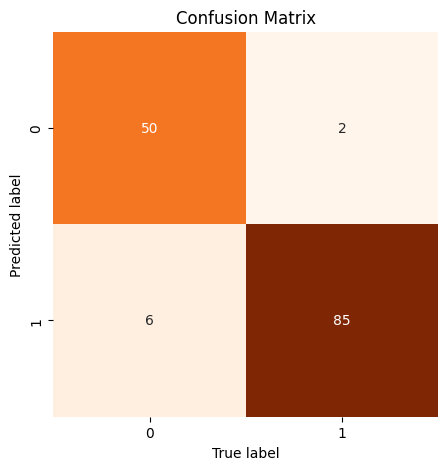

In [190]:
fig, (ax1) = plt.subplots(1, figsize=(10, 5))

# Confusion matrix
C = confusion_matrix(y_test, predictions)
sns.heatmap(C.T,
            square=True,
            annot=True,
            fmt='d',
            cmap='Oranges',
            cbar=False,
            ax=ax1)

ax1.set(title='Confusion Matrix', xlabel='True label', ylabel='Predicted label');

#### 7. Grow a forest of decision trees. Use this as a classifier and predictor of values in your dataset. Compare the classification and prediction results of the forest with those of the initial tree you used.

Random Forest is another tree based classifier that uses the 'Bagging' or ensemble learning technique. Simply put, this algorithm aggregrates multiple generated trees into one model, when making a classification each tree vote on which class and the class that recieves the majority of votes will be the final predicted class.

In [420]:
# Trains Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

# Evaluates classifier
rf_train = rf_clf.score(X_train, y_train)
rf_test = rf_clf.score(X_test, y_test)
rf_test

0.965034965034965

Using Random Forest shows an increse in performance over a singular Decision Tree.

In [421]:
# Makes predictions
predictions = rf_clf.predict(X_test)

report = classification_report(y_test, predictions)
print('Classification report for {}: \n'.format(rf_clf))
print(report)

Classification report for RandomForestClassifier(): 

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        56
           1       0.97      0.98      0.97        87

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



The confusion matrix can also be viewed below. Although there is an increase in accuracy, the rate of false positives to false negatives etc as shown in the confusion matrix is relatively similar across the two models.

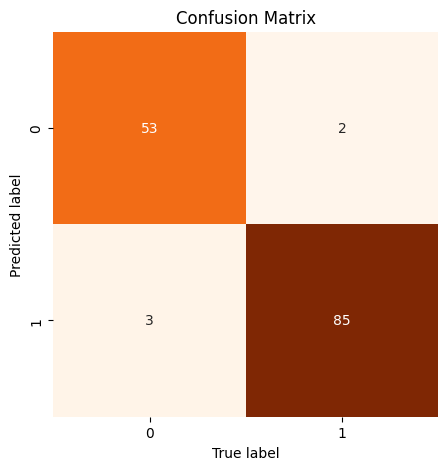

In [422]:
fig, (ax1) = plt.subplots(1, figsize=(10, 5))

# Confusion matrix
C = confusion_matrix(y_test, predictions)
sns.heatmap(C.T,
            square=True,
            annot=True,
            fmt='d',
            cmap='Oranges',
            cbar=False,
            ax=ax1)

ax1.set(title='Confusion Matrix', xlabel='True label', ylabel='Predicted label');

Overall, using Random Forest shows an increase in both train and test accuracy.

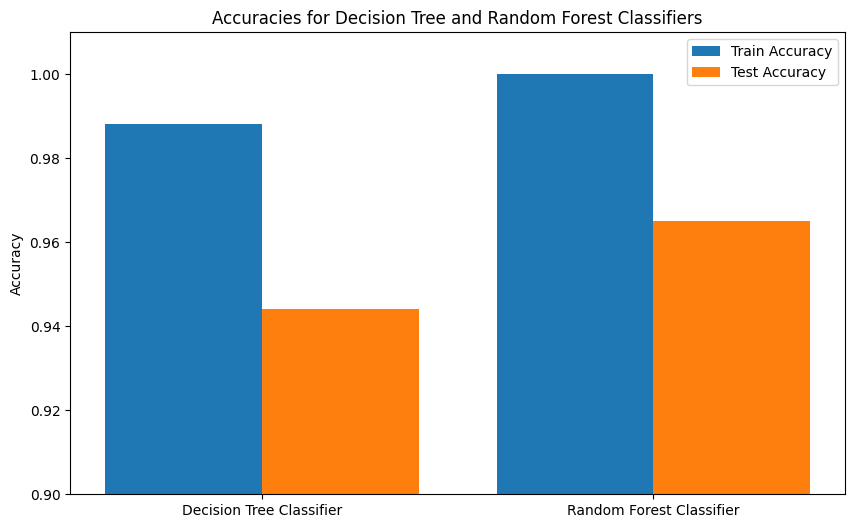

In [423]:
# Plots accuracies for both models
X_axis = np.arange(2)
plt.figure(figsize=(10,6))
plt.bar(X_axis - 0.2, [tree_train, rf_train], width=0.4, label='Train Accuracy')
plt.bar(X_axis + 0.2, [tree_test, rf_test], width=0.4, label='Test Accuracy')
plt.xticks(X_axis, ['Decision Tree Classifier','Random Forest Classifier'])
plt.ylim(0.9,1.01)
plt.ylabel('Accuracy')
plt.title("Accuracies for Decision Tree and Random Forest Classifiers")
plt.legend()
plt.show()

#### 8. Describe the Boosting method. Under what conditions would you use it?

Boosting is an ensemble machine learning method that involves improving the performance of weaker models by subsequently combining them together to create one stronger model. The subsequent model will often make up for the errors of the previous model in the ensemble. It can used for both classification and regression problems and on a diverse range of data, making this algorithm particularly robust. Boosting, however, despite its simplicity, can be a computationally expensive technique and can also lead to overfitting.

One such algorithm is AdaBoost, short for Adaptive Boosting, was one of the first algorithms of this type. AdaBoost is highly adaptive; it works by focusing on the misclassifications of the previous model and correcting them with a different model, enabling it to iteratively take in feedback, similar to a neural network.  

#### 9. Describe the Gradient Boosting method. Under what conditions would you use it?

Gradient Boosting is another machine learning model that uses decision trees. Similar to Random Forest, Gradient Boosting is an ensemble method and builds upon the previously mentioned Boosting method by using gradient descent to fit each added tree and can be used in similar circumstances with tabular datasets.

One Graident Boosting method that can be implemented with SciKit-Learn is GradientBoostingClassifier, however, there are also other algorithms such as XGBoost (Extreme Gradient Boosting) which is an expansion of Gradient Boosting. For GradientBoostingClassifier, the learning rate, i.e. the weight that each tree has on the overall model, is an important hyper-parameter and can determine the number of trees required for the model.

In [445]:
# Train Gradient Boosting Classifier
GBM = GradientBoostingClassifier(learning_rate=1)
GBM.fit(X_train, y_train)

# Evaluates classifier
GBM_train = GBM.score(X_train, y_train)
GBM_test = GBM.score(X_test, y_test)
GBM_test

0.965034965034965

Compared to DecisionTreeClassifier and RandomForest, GradientBoostingClassifier performs equally as well on the test set as RandomForest - suggesting that ensemble learning methods are potentially superior for this data.

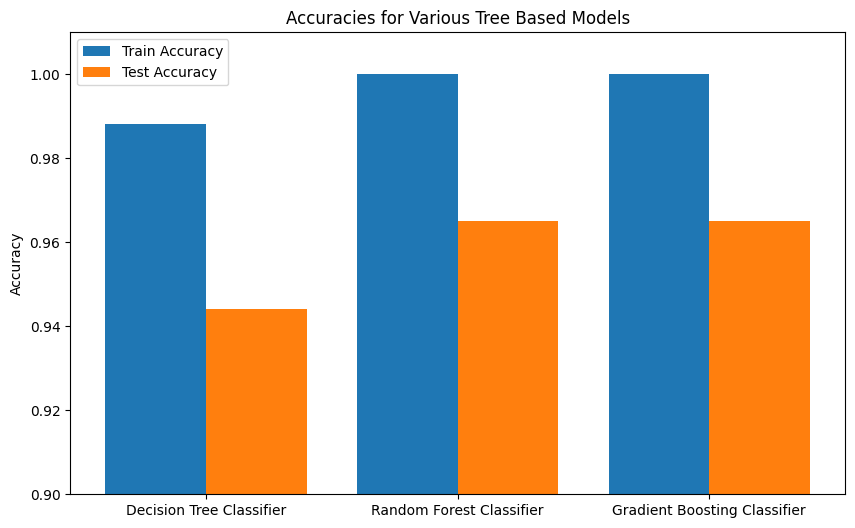

In [446]:
# Plots accuracies for both models
X_axis = np.arange(3)
plt.figure(figsize=(10,6))
plt.bar(X_axis - 0.2, [tree_train, rf_train, GBM_train], width=0.4, label='Train Accuracy')
plt.bar(X_axis + 0.2, [tree_test, rf_test, GBM_test], width=0.4, label='Test Accuracy')
plt.xticks(X_axis, ['Decision Tree Classifier','Random Forest Classifier', 'Gradient Boosting Classifier'])
plt.ylim(0.9,1.01)
plt.ylabel('Accuracy')
plt.title("Accuracies for Various Tree Based Models")
plt.legend()
plt.show()

#### 10. Use SciKit-learn to automatically find the optimum number of trees in your random forest for classification and prediction. Explain your choice of function, and reasoning.

To automatically find the optimum number of trees in my random forest model, I have again used GridSearchCV. Despite having only one parameter, grid search is an easy to use function for determining the most appropriate hyper-parameter values and by using cross-validation I can ensure that the result is the most transferable to unseen data. This is because CV shuffles and splits the data in a number of folds (in this case 5), fits the model for each value on each fold of the data and then provides the mean accuracy for each fold.

In [447]:
# Automatically determines best value for n_estimators
grid = GridSearchCV(RandomForestClassifier(), {'n_estimators': [int(n) for n in (np.linspace(100, 500, 20))]}, cv=5)

grid.fit(X_train,y_train).best_params_

{'n_estimators': 268}

In [459]:
# Trains model with 268 trees
rf2_clf = RandomForestClassifier(n_estimators= 268)
rf2_clf.fit(X_train, y_train)

# Evaluates model
rf2_train = rf2_clf.score(X_train, y_train)
rf2_test = rf2_clf.score(X_test, y_test)

# Makes predictions and produces classification report
predictions = rf2_clf.predict(X_test)

report = classification_report(y_test, predictions)
print('Classification report for {}: \n'.format(rf_clf))
print(report)

rf2_test

Classification report for RandomForestClassifier(): 

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        56
           1       0.97      0.98      0.97        87

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



0.965034965034965

The overall accuracy of the tuned Random Forest model is 96.5%. This marks no improvement from the previous two models.

### Clustering

#### 11. Use SciKit-Learn to apply a K-means clustering algorithm on your dataset. Change the value of K and document the effect that this has on the clustering results and decision boundaries.

K-Means is a clustering algorithm that can be used on both supervised and unsupervised data. Clustering can be used for classification as well as regression. A derivative alogortihm is KNN, K-Nearest-Neighbour.

The most important hyper-parameter for this algorithm is the number of clusters in which the data will be grouped. This can be set via the `n_clusters` parameter.

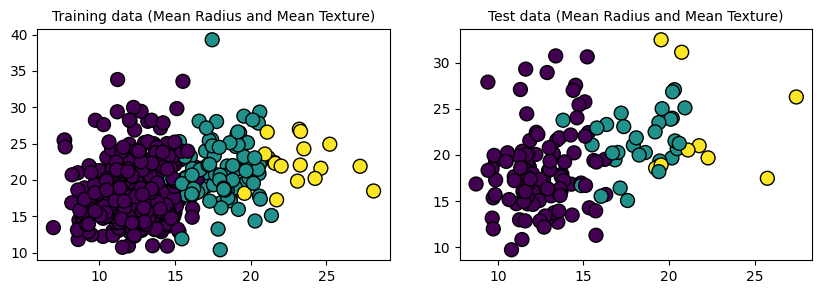

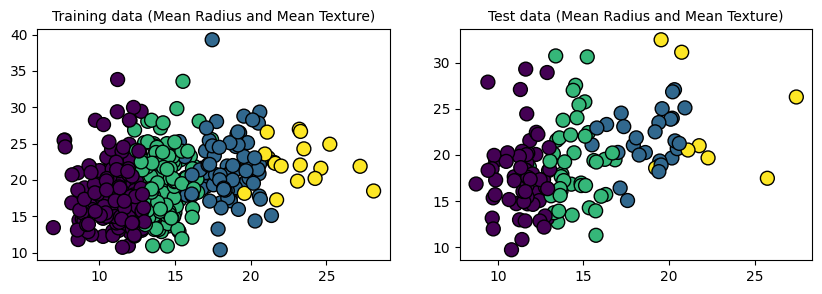

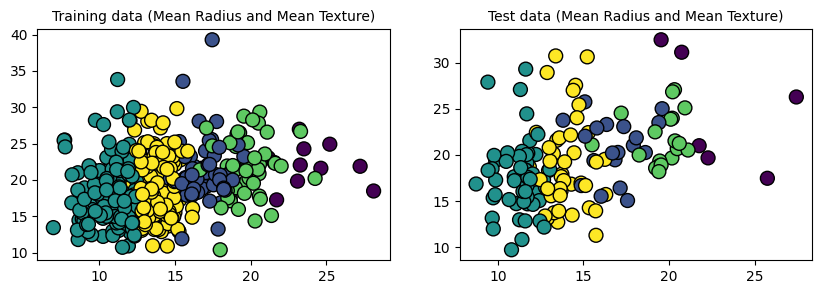

In [460]:
# Training KMeans models with K values 3, 4 and 5.
for K in range(3,6):

  kmeans = KMeans(n_clusters=K, n_init=10).fit(X_train, y_train)
  # n_init is set to 10
  # as this is the default value which is changing to auto in the next version of sklearn
  # setting it avoids an warning
  y_pred = kmeans.predict(X_train)
  y_pred_test = kmeans.predict(X_test)

  plt.figure(figsize = (10,3))

  plt.subplot(1,2,1)
  plt.scatter(X_train['mean radius'], X_train['mean texture'], c=y_pred,s=100,edgecolors='black')
  plt.title("Training data (Mean Radius and Mean Texture)", fontsize=10)

  plt.subplot(1,2,2)
  plt.scatter(X_test['mean radius'], X_test['mean texture'], c=y_pred_test,s=100,edgecolors='black')
  plt.title("Test data (Mean Radius and Mean Texture)", fontsize=10)

  plt.show()

Above we can see how the different values of K affect the decision boundaries.The decision boundaries are only shown on the mean radius and mean texture features of the data in the above 2D representations. However, the algorithm does cluster all 30 features, but this cannot be visualised due to its high dimensionality.

#### 12. Find the optimum value of K. Use SciKit-Learn to alter the batch sizes for the K means algorithm.


It is possible to alter the batch sizes for the K means algorithm using Mini Batch K means. This is a variation of the Kmeans model that splits the data into smaller groups called 'batches'. Each batch is selected from the data randomly. Only one subset is stored in memory at a time - hence, this is useful for problems that require a large amount of RAM - and the algorithm updates the clusters iteratively based on each new batch of data.

Below, I have visualised the effect of batch size on the MiniBatchKMeans model (using four clusters) in a 2D space. As our dataset is so small, only marginal differences can be observed.

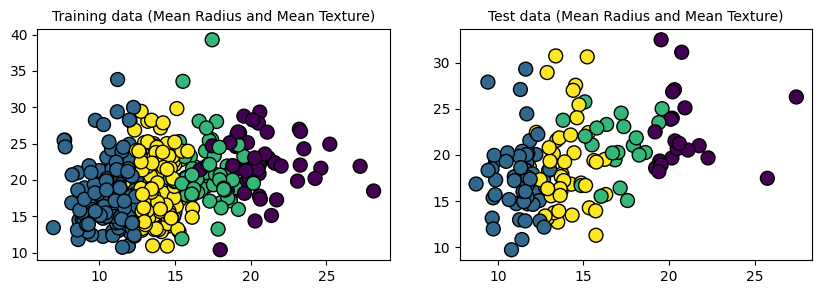

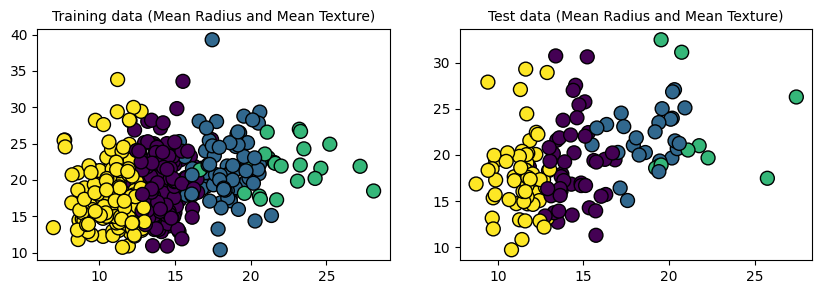

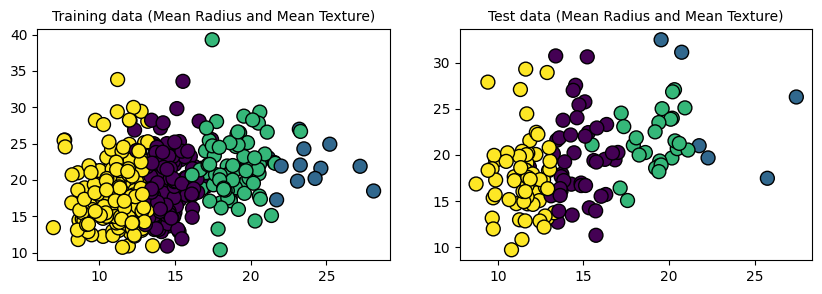

In [314]:
for n in [10, 100, 1000]:

  kmeans = MiniBatchKMeans(n_clusters=4, n_init=3, batch_size=n).fit(X_train, y_train)
  y_pred = kmeans.predict(X_train)
  y_pred_test = kmeans.predict(X_test)

  plt.figure(figsize = (10,3))

  plt.subplot(1,2,1)
  plt.scatter(X_train['mean radius'], X_train['mean texture'], c=y_pred,s=100,edgecolors='black')
  plt.title("Training data (Mean Radius and Mean Texture)", fontsize=10)

  plt.subplot(1,2,2)
  plt.scatter(X_test['mean radius'], X_test['mean texture'], c=y_pred_test,s=100,edgecolors='black')
  plt.title("Test data (Mean Radius and Mean Texture)", fontsize=10)

  plt.show()

#### 13. Use the elbow rule to experiment and find the optimum number of clusters. Document your findings.


In order to find the optimum value of K for KMeans, i.e. the optimum number of clusters, it is suggested to use the elbow rule. This method calculates the sum of the squared distance from each point to the center of its assigned cluster. These are called distortions.

In [302]:
# Calculate distortions

distortions = []
K = range(2, 30)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=10)
    kmeanModel.fit(X_train, y_train)
    distortions.append(kmeanModel.inertia_)

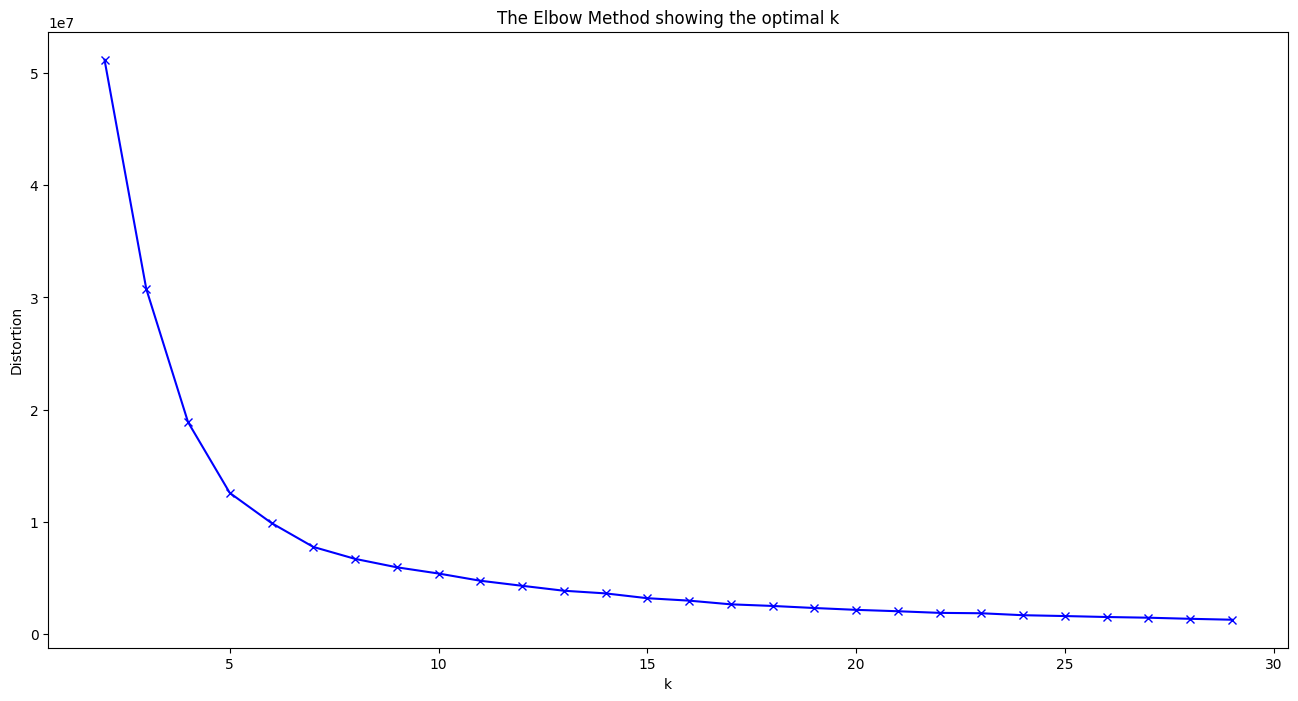

In [303]:
# Plot distortions
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The graph suggests that the ideal number of clusters is 5. This is regarded as 'the elbow'. The decision boundary in the 2D space for K=5 is plotted below.

Text(0.5, 1.0, 'Test data (Mean Radius and Mean Texture)')

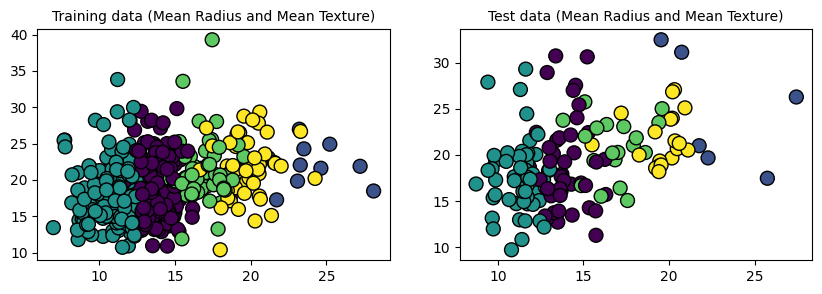

In [306]:
kmeans = KMeans(n_clusters=5, n_init=10).fit(X_train, y_train)
y_pred = kmeans.predict(X_train)
y_pred_test = kmeans.predict(X_test)

plt.figure(figsize = (10,3))

plt.subplot(1,2,1)
plt.scatter(X_train['mean radius'], X_train['mean texture'], c=y_pred,s=100,edgecolors='black')
plt.title("Training data (Mean Radius and Mean Texture)", fontsize=10)

plt.subplot(1,2,2)
plt.scatter(X_test['mean radius'], X_test['mean texture'], c=y_pred_test,s=100,edgecolors='black')
plt.title("Test data (Mean Radius and Mean Texture)", fontsize=10)

#### 14. Explain how you would use the clustering method for pre-processing data? What advantage would this give you?

Clustering can be used to pre-process data in numerous ways. One way in particular is by clustering unsupervised data into groups or recognising unseen patterns in data. This allows us to 'classify' data that is unlabeled. These clusters could be used to subset the data for further machine learning processes. For example, shoppers could be clustered according to a customer profile. A different recommender system could then be trained on each customer profile, allowing for increased flexibility.

Clustering can also be used for anomaly detection by clustering noise away from important data, such as in fraud detection. Clustering could also be helpful for dimensionality reduction. For example, the breast cancer dataset contains 30 feature dimensions. However, according to the elbow rule the ideal number of clusters for KMeans is only 5. Reducing this data down to five dimenisons before feeding it into a further machine learning pipeline could result in significantly reduced loss.

### TensorFlow and Classification

#### 15. Import TensorFlow and Keras Python libraries. Build a classifier, split your data into testing and training datasets. Justify your choice of neural network architecture and hyperparameter values. Document your results.


In [91]:
# Imports the required modules from tensorflow and keras libraries
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, LeakyReLU
from keras.optimizers import SGD
from keras.backend import clear_session
from keras.callbacks import EarlyStopping

Using Keras as a front-end for Tensorflow, I have built a simple feed-forward neural network with three dense layers. Due to the simple, numerical nature of the data, it is likely to perform well with a simple model with fewer nodes over a more complex and specialised model such as CNN, RNN, or LSTM. Since the model is performing binary classification there is no need to vectorize the target labels, for example by using LabelBinarizer, and the previous train-test split of the data can be again utilised. The model uses Stocastic Gradient Descent as its optimizer. A summary of the model is printed below.

In [92]:
# Clears session if a neural network as been built previously
clear_session()

# Defines neural model
model = Sequential()
model.add(Dense(64, input_dim=(X_train.shape[1]), activation="sigmoid"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

sgd=SGD(0.01)

# Builds model
model.compile(loss="binary_crossentropy",
              optimizer=sgd,
	            metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,041
Trainable params: 3,041
Non-trainable params: 0
_________________________________________________________________


#### 16. Using Keras and TensorFlow, train and evaluate your neural network model. Plot how the testing and validation errors change with the number of training epochs. Make predictions.

Over the next few cells, I have trained and evaluated my neural network using a range of epochs, 150, 100 and 50.

In [93]:
# Trains 150 epoch model
H = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=150, batch_size=128)

# Evaluates 150 epoch model
_, acc0 = model.evaluate(X_train, y_train, verbose=0)
_, test_acc0 = model.evaluate(X_test, y_test, verbose=0)

acc0, test_acc0

Epoch 1/150
4/4 [==============================] - 1s 108ms/step - loss: 0.6585 - accuracy: 0.6338 - val_loss: 0.6443 - val_accuracy: 0.6084
Epoch 2/150
4/4 [==============================] - 0s 24ms/step - loss: 0.6169 - accuracy: 0.6338 - val_loss: 0.6462 - val_accuracy: 0.6084
Epoch 3/150
4/4 [==============================] - 0s 26ms/step - loss: 0.6131 - accuracy: 0.6338 - val_loss: 0.6304 - val_accuracy: 0.6084
Epoch 4/150
4/4 [==============================] - 0s 23ms/step - loss: 0.6055 - accuracy: 0.6338 - val_loss: 0.6268 - val_accuracy: 0.6084
Epoch 5/150
4/4 [==============================] - 0s 26ms/step - loss: 0.6061 - accuracy: 0.6338 - val_loss: 0.6227 - val_accuracy: 0.6084
Epoch 6/150
4/4 [==============================] - 0s 25ms/step - loss: 0.5988 - accuracy: 0.6338 - val_loss: 0.6081 - val_accuracy: 0.6084
Epoch 7/150
4/4 [==============================] - 0s 20ms/step - loss: 0.5941 - accuracy: 0.6338 - val_loss: 0.6151 - val_accuracy: 0.6084
Epoch 8/150
4/4 [==

(0.68544602394104, 0.6853147149085999)

In [94]:
# Builds, trains and evaluates 100 epoch model

clear_session()

model = Sequential()
model.add(Dense(64, input_dim=(X_train.shape[1]), activation="sigmoid"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

sgd = SGD(0.01)

model.compile(loss="binary_crossentropy",
              optimizer=sgd,
	            metrics=["accuracy"])

H1 = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=100, batch_size=128)

_, acc1 = model.evaluate(X_train, y_train, verbose=0)
_, test_acc1 = model.evaluate(X_test, y_test, verbose=0)

acc1, test_acc1

Epoch 1/100
4/4 [==============================] - 1s 73ms/step - loss: 0.7598 - accuracy: 0.6338 - val_loss: 0.7004 - val_accuracy: 0.6084
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 0.6663 - accuracy: 0.6338 - val_loss: 0.6778 - val_accuracy: 0.6084
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 0.6451 - accuracy: 0.6338 - val_loss: 0.6473 - val_accuracy: 0.6084
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6273 - accuracy: 0.6338 - val_loss: 0.6534 - val_accuracy: 0.6084
Epoch 5/100
4/4 [==============================] - 0s 18ms/step - loss: 0.6299 - accuracy: 0.6338 - val_loss: 0.6402 - val_accuracy: 0.6084
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 0.6371 - accuracy: 0.6338 - val_loss: 0.6504 - val_accuracy: 0.6084
Epoch 7/100
4/4 [==============================] - 0s 18ms/step - loss: 0.6239 - accuracy: 0.6338 - val_loss: 0.6336 - val_accuracy: 0.6084
Epoch 8/100
4/4 [===

(0.6338028311729431, 0.6083915829658508)

In [95]:
# Builds, trains and evaluates 50 epoch model

clear_session()

model = Sequential()
model.add(Dense(64, input_dim=(X_train.shape[1]), activation="sigmoid"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

sgd=SGD(0.01)

model.compile(loss="binary_crossentropy",
              optimizer=sgd,
	            metrics=["accuracy"])

H2 = model.fit(X_train, y_train,
               validation_data=(X_test, y_test),
               epochs=50, batch_size=128)

_, acc2 = model.evaluate(X_train, y_train, verbose=0)
_, test_acc2 = model.evaluate(X_test, y_test, verbose=0)

acc2, test_acc2

Epoch 1/50
4/4 [==============================] - 1s 71ms/step - loss: 1.1625 - accuracy: 0.3662 - val_loss: 0.8582 - val_accuracy: 0.3916
Epoch 2/50
4/4 [==============================] - 0s 18ms/step - loss: 0.8351 - accuracy: 0.3662 - val_loss: 0.7461 - val_accuracy: 0.3916
Epoch 3/50
4/4 [==============================] - 0s 13ms/step - loss: 0.7392 - accuracy: 0.3662 - val_loss: 0.7023 - val_accuracy: 0.3916
Epoch 4/50
4/4 [==============================] - 0s 14ms/step - loss: 0.6946 - accuracy: 0.3662 - val_loss: 0.6580 - val_accuracy: 0.3916
Epoch 5/50
4/4 [==============================] - 0s 18ms/step - loss: 0.6574 - accuracy: 0.6831 - val_loss: 0.6285 - val_accuracy: 0.8951
Epoch 6/50
4/4 [==============================] - 0s 16ms/step - loss: 0.6296 - accuracy: 0.8638 - val_loss: 0.6184 - val_accuracy: 0.8741
Epoch 7/50
4/4 [==============================] - 0s 13ms/step - loss: 0.6336 - accuracy: 0.7324 - val_loss: 0.6304 - val_accuracy: 0.7343
Epoch 8/50
4/4 [===========

(0.8802816867828369, 0.9300699234008789)

Below, I have plotted how the testing and validation errors change with the number of training epochs.

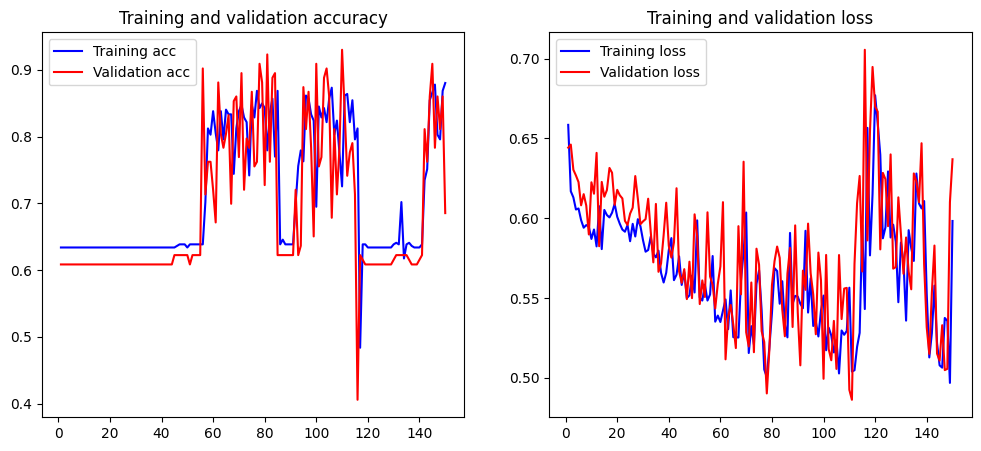

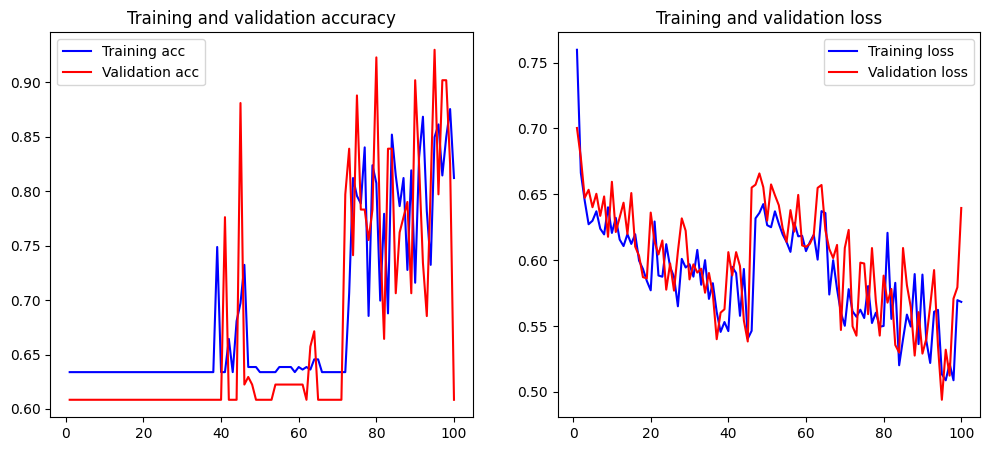

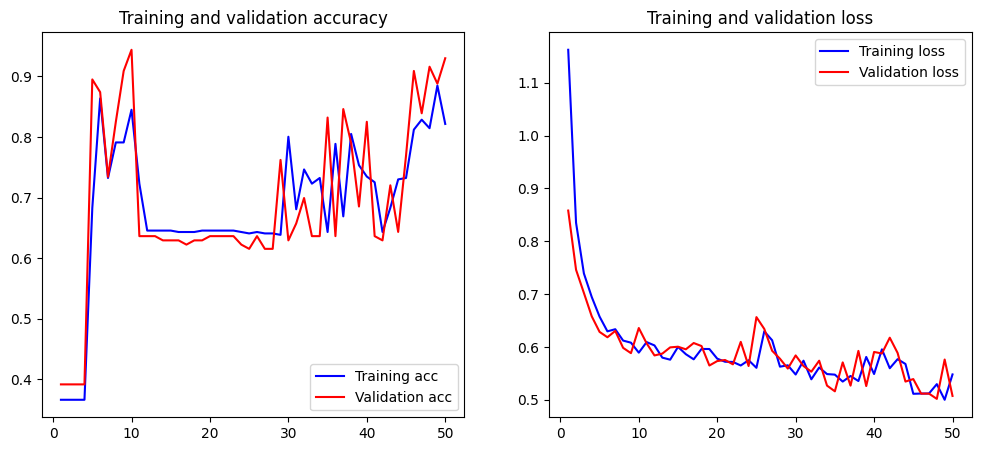

In [96]:
# Plot learning histories for each model

histories = [H, H1, H2]

for hist in histories:
  acc = hist.history['accuracy']
  val_acc = hist.history['val_accuracy']
  loss = hist.history['loss']
  val_loss = hist.history['val_loss']
  x = range(1, len(acc) + 1)

  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(x, acc, 'b', label='Training acc')
  plt.plot(x, val_acc, 'r', label='Validation acc')
  plt.title(f'Training and validation accuracy')
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(x, loss, 'b', label='Training loss')
  plt.plot(x, val_loss, 'r', label='Validation loss')
  plt.title(f'Training and validation loss')
  plt.legend()

We can now use our model to make predictions. For example, the final and most accurate model predicts that the first set of features suggests the mass is malignant. However, we can see that the mass is actually benign due to the 0 value. This model achieved 93% accuracy after 50 epochs.

In [97]:
# Make predictions
y_predictions = model.predict(X_test, batch_size=128)

print(f'Probability of Malignancy: {y_predictions[0]}, Class: {y_test.values[0]}')

2/2 [==============================] - 0s 5ms/step
Probability of Malignancy: [0.4815046], Class: 0


### Deep Neural Networks

#### 17. Explain what a “deep wide neural network” is. What are its advantages?


Neural networks are machine learnings models that somewhat mimnic the structure of the human brain. They are composed of layers of neurons (or nodes/units) and weights connected to each other. Each node is fired when called by an activation function which specifies the type of output that node will transmit. Neural networks are highly effective, especially when working with large datasets as they can have over a million weight parameters. These weights can be learnt and sequentially updated from their random initialisation according to a process called backpropogation.

The width of a neural network refers to the number of neurons/nodes it has at each layer. A wide neural network may have only a single layer with extremely numerous amount of neurons. A deep neural network, on the other hand, has many layers but may not have many nodes on a single layer. Both wide and deep neural networks have advantages in different tasks. A deep, wide neural network is a network that has both many layers and many nodes. The advantage of these networks is their ability to model complex and/or hierarchical relationships between expectionally large amounts of training data. However, the training process may be lengthy and the complexity of the model may allow for overfitting of the training data.  

#### 18. Experiment with the number of Hidden layers in your neural network. Using SciKit- Learn. Experiment with the number of neurons per hidden layer. Experiment with the number of training epochs, and also the training rate. Document your results.

I have experimented with both 4 layer and 5 layer neural networks and compared their accuracy to my baseline 3 layer neural network. I have also increased the number of neurons for each layer and thus the total number of neurons.

In [102]:
# Build and trains 4 layer FFNN
clear_session()

model = Sequential()
model.add(Dense(128, input_dim=(X_train.shape[1]), activation="sigmoid"))
model.add(Dense(64, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer=sgd,
	            metrics=["accuracy"])

H3 = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=50, batch_size=128)

Epoch 1/50
4/4 [==============================] - 1s 146ms/step - loss: 0.6611 - accuracy: 0.7347 - val_loss: 0.6138 - val_accuracy: 0.8042
Epoch 2/50
4/4 [==============================] - 0s 24ms/step - loss: 0.5999 - accuracy: 0.8498 - val_loss: 0.5616 - val_accuracy: 0.9301
Epoch 3/50
4/4 [==============================] - 0s 20ms/step - loss: 0.5620 - accuracy: 0.8592 - val_loss: 0.5615 - val_accuracy: 0.7622
Epoch 4/50
4/4 [==============================] - 0s 21ms/step - loss: 0.5468 - accuracy: 0.8216 - val_loss: 0.5366 - val_accuracy: 0.7972
Epoch 5/50
4/4 [==============================] - 0s 20ms/step - loss: 0.5400 - accuracy: 0.8192 - val_loss: 0.5898 - val_accuracy: 0.7063
Epoch 6/50
4/4 [==============================] - 0s 15ms/step - loss: 0.5498 - accuracy: 0.7488 - val_loss: 0.5710 - val_accuracy: 0.7063
Epoch 7/50
4/4 [==============================] - 0s 23ms/step - loss: 0.5509 - accuracy: 0.7793 - val_loss: 0.5314 - val_accuracy: 0.8392
Epoch 8/50
4/4 [==========

In [103]:
# Evaluates model

_, acc3 = model.evaluate(X_train, y_train, verbose=0)
_, test_acc3 = model.evaluate(X_test, y_test, verbose=0)

acc3, test_acc3

(0.8403756022453308, 0.8251748085021973)

The 4 layer FFNN performs less accurately than the 3 layer FFNN discussed in the previous section and the below 5 layer FFNN performs even less accurately.

In [100]:
# Builds and trains 5-layer network
clear_session()

model = Sequential()
model.add(Dense(264, input_dim=(X_train.shape[1]), activation="sigmoid"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer=sgd,
	            metrics=["accuracy"])

H4 = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=50, batch_size=128)

Epoch 1/50
4/4 [==============================] - 1s 94ms/step - loss: 0.7333 - accuracy: 0.3662 - val_loss: 0.6871 - val_accuracy: 0.3916
Epoch 2/50
4/4 [==============================] - 0s 19ms/step - loss: 0.6870 - accuracy: 0.3662 - val_loss: 0.6665 - val_accuracy: 0.4406
Epoch 3/50
4/4 [==============================] - 0s 22ms/step - loss: 0.6664 - accuracy: 0.7230 - val_loss: 0.6525 - val_accuracy: 0.9371
Epoch 4/50
4/4 [==============================] - 0s 17ms/step - loss: 0.6536 - accuracy: 0.8756 - val_loss: 0.6424 - val_accuracy: 0.9091
Epoch 5/50
4/4 [==============================] - 0s 25ms/step - loss: 0.6338 - accuracy: 0.8897 - val_loss: 0.6076 - val_accuracy: 0.8671
Epoch 6/50
4/4 [==============================] - 0s 20ms/step - loss: 0.6033 - accuracy: 0.8709 - val_loss: 0.5896 - val_accuracy: 0.8531
Epoch 7/50
4/4 [==============================] - 0s 21ms/step - loss: 0.5770 - accuracy: 0.8685 - val_loss: 0.5621 - val_accuracy: 0.9021
Epoch 8/50
4/4 [===========

In [101]:
# Evaluates model
_, acc4 = model.evaluate(X_train, y_train, verbose=0)
_, test_acc4 = model.evaluate(X_test, y_test, verbose=0)

acc4, test_acc4

(0.7793427109718323, 0.7692307829856873)

I have also experiments further with the number of epochs for the larger models. Below I have built and trained the 4 layer model with 100 epochs (with early stopping), however, this proved to be even more detrimental.

In [104]:
# Builds and trains 4 layer network
clear_session()

model = Sequential()
model.add(Dense(128, input_dim=(X_train.shape[1]), activation="sigmoid"))
model.add(Dense(64, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer=sgd,
	            metrics=["accuracy"])

# Epochs = 100
H5 = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=100, batch_size=128,
              callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

# Evaluates model
_, acc5 = model.evaluate(X_train, y_train, verbose=0)
_, test_acc5 = model.evaluate(X_test, y_test, verbose=0)

acc5, test_acc5

Epoch 1/100
4/4 [==============================] - 1s 79ms/step - loss: 0.6845 - accuracy: 0.5305 - val_loss: 0.6227 - val_accuracy: 0.7832
Epoch 2/100
4/4 [==============================] - 0s 19ms/step - loss: 0.6034 - accuracy: 0.7089 - val_loss: 0.6100 - val_accuracy: 0.6084
Epoch 3/100
4/4 [==============================] - 0s 19ms/step - loss: 0.5931 - accuracy: 0.6338 - val_loss: 0.5838 - val_accuracy: 0.6084
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.5742 - accuracy: 0.6338 - val_loss: 0.5992 - val_accuracy: 0.6084
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 0.5789 - accuracy: 0.6338 - val_loss: 0.6084 - val_accuracy: 0.6084
Epoch 6/100
4/4 [==============================] - 0s 19ms/step - loss: 0.5788 - accuracy: 0.6338 - val_loss: 0.5765 - val_accuracy: 0.6084
Epoch 7/100
4/4 [==============================] - 0s 20ms/step - loss: 0.5651 - accuracy: 0.6338 - val_loss: 0.5672 - val_accuracy: 0.6084
Epoch 8/100
4/4 [===

(0.6478873491287231, 0.6363636255264282)

The below graph shows that the wider and deeper the network becomes, the worst is its accuracy. This is likely due to the small size of the breast cancer dataset that is more suitable to traditional machine learning algorithms and not appropriate for large-scale machine learnaing approaches.

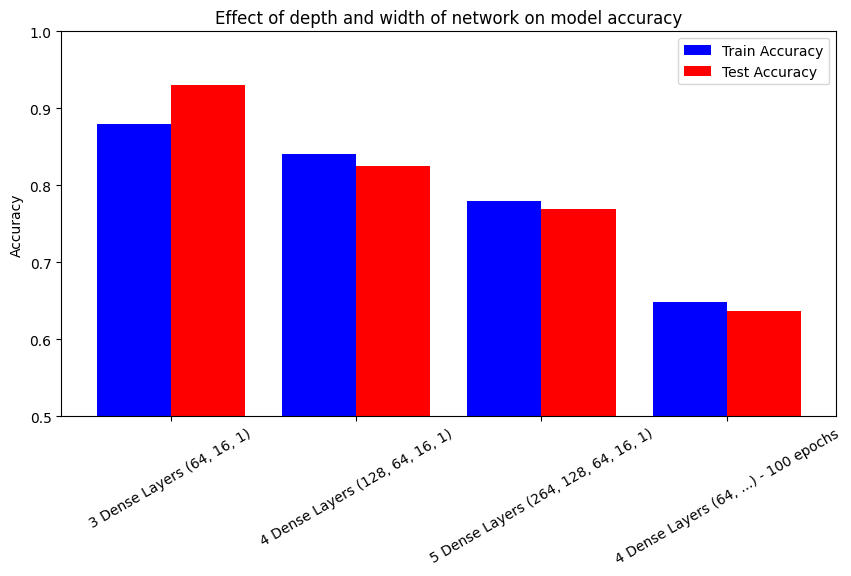

In [105]:
# Plots models on graph

train_accuracies = [acc2, acc3, acc4, acc5]
test_accuracies = [test_acc2, test_acc3, test_acc4, test_acc5]

X_axis = np.arange(len(train_accuracies))
plt.figure(figsize=(10,5))
plt.bar(X_axis - 0.2, train_accuracies, width=0.4, label='Train Accuracy', color='blue')
plt.bar(X_axis + 0.2, test_accuracies, width=0.4, label='Test Accuracy', color='red')
plt.xticks(X_axis, ['3 Dense Layers (64, 16, 1)','4 Dense Layers (128, 64, 16, 1)','5 Dense Layers (264, 128, 64, 16, 1)', '4 Dense Layers (64, ...) - 100 epochs'], rotation=30)
plt.ylim(0.5,1)
plt.ylabel('Accuracy')
plt.title("Effect of depth and width of network on model accuracy")
plt.legend()
plt.show()

I have also customised the learning rate of SGD and plotted the results on a graph.

In [106]:
# Decreased learning rate model

clear_session()

model = Sequential()
model.add(Dense(64, input_dim=(X_train.shape[1]), activation="sigmoid"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

SGD = (0.005)

model.compile(loss="binary_crossentropy",
              optimizer=sgd,
	            metrics=["accuracy"])

H6 = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=50, batch_size=128)

_, acc6 = model.evaluate(X_train, y_train, verbose=0)
_, test_acc6 = model.evaluate(X_test, y_test, verbose=0)

acc6, test_acc6

Epoch 1/50
4/4 [==============================] - 1s 105ms/step - loss: 0.7400 - accuracy: 0.6244 - val_loss: 0.6696 - val_accuracy: 0.6084
Epoch 2/50
4/4 [==============================] - 0s 34ms/step - loss: 0.6506 - accuracy: 0.6338 - val_loss: 0.6596 - val_accuracy: 0.6084
Epoch 3/50
4/4 [==============================] - 0s 45ms/step - loss: 0.6446 - accuracy: 0.6338 - val_loss: 0.6410 - val_accuracy: 0.6084
Epoch 4/50
4/4 [==============================] - 0s 49ms/step - loss: 0.6349 - accuracy: 0.6338 - val_loss: 0.6603 - val_accuracy: 0.6084
Epoch 5/50
4/4 [==============================] - 0s 65ms/step - loss: 0.6352 - accuracy: 0.6338 - val_loss: 0.6461 - val_accuracy: 0.6084
Epoch 6/50
4/4 [==============================] - 0s 52ms/step - loss: 0.6215 - accuracy: 0.6338 - val_loss: 0.6254 - val_accuracy: 0.6084
Epoch 7/50
4/4 [==============================] - 0s 42ms/step - loss: 0.6181 - accuracy: 0.6338 - val_loss: 0.6372 - val_accuracy: 0.6084
Epoch 8/50
4/4 [==========

(0.81455397605896, 0.8041958212852478)

In [107]:
# Increased learning rate model

clear_session()

model = Sequential()
model.add(Dense(64, input_dim=(X_train.shape[1]), activation="sigmoid"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

SGD = (0.015)

model.compile(loss="binary_crossentropy",
              optimizer=sgd,
	            metrics=["accuracy"])

H7 = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=50, batch_size=128)

_, acc7 = model.evaluate(X_train, y_train, verbose=0)
_, test_acc7 = model.evaluate(X_test, y_test, verbose=0)

acc7, test_acc7

Epoch 1/50
4/4 [==============================] - 1s 75ms/step - loss: 0.6253 - accuracy: 0.8169 - val_loss: 0.5958 - val_accuracy: 0.8182
Epoch 2/50
4/4 [==============================] - 0s 20ms/step - loss: 0.5932 - accuracy: 0.8122 - val_loss: 0.5891 - val_accuracy: 0.7622
Epoch 3/50
4/4 [==============================] - 0s 18ms/step - loss: 0.5826 - accuracy: 0.7840 - val_loss: 0.5822 - val_accuracy: 0.7063
Epoch 4/50
4/4 [==============================] - 0s 19ms/step - loss: 0.5803 - accuracy: 0.6737 - val_loss: 0.5851 - val_accuracy: 0.6993
Epoch 5/50
4/4 [==============================] - 0s 14ms/step - loss: 0.5693 - accuracy: 0.7535 - val_loss: 0.5598 - val_accuracy: 0.8042
Epoch 6/50
4/4 [==============================] - 0s 15ms/step - loss: 0.5545 - accuracy: 0.7817 - val_loss: 0.5514 - val_accuracy: 0.8671
Epoch 7/50
4/4 [==============================] - 0s 19ms/step - loss: 0.5593 - accuracy: 0.7441 - val_loss: 0.5527 - val_accuracy: 0.8182
Epoch 8/50
4/4 [===========

(0.8849765062332153, 0.9160839319229126)

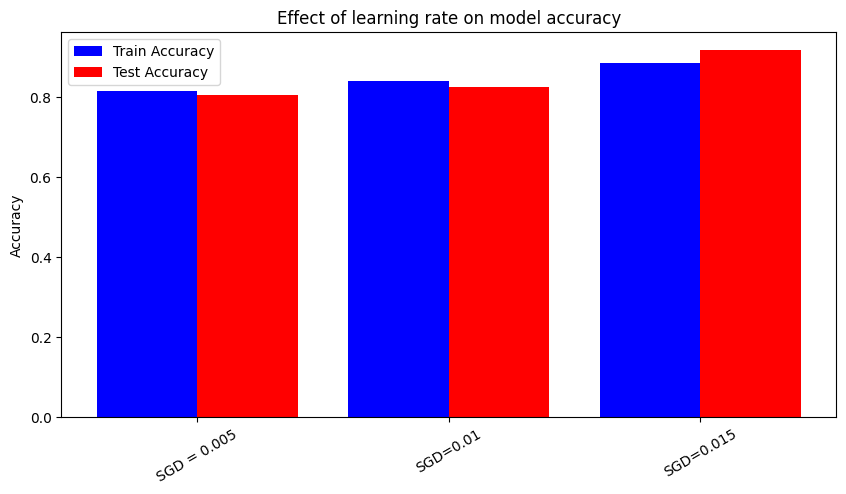

In [108]:
# Plot accuracies

train_accuracies = [acc6, acc3, acc7]
test_accuracies = [test_acc6, test_acc3, test_acc7]

X_axis = np.arange(len(train_accuracies))
plt.figure(figsize=(10,5))
plt.bar(X_axis - 0.2, train_accuracies, width=0.4, label='Train Accuracy', color='blue')
plt.bar(X_axis + 0.2, test_accuracies, width=0.4, label='Test Accuracy', color='red')
plt.xticks(X_axis, ['SGD = 0.005','SGD=0.01','SGD=0.015'], rotation=30)
plt.ylabel('Accuracy')
plt.title("Effect of learning rate on model accuracy")
plt.legend()
plt.show()

This experimentation showed that a higher learning rate such as 0.015 is preferable with 92.6% test accuracy.

## Section B

#### From Keras, use the “Leaky ReLU” activation function. Experiment with a range of the values for alpha, the negative slope coefficient of Leaky ReLU. Document your results.

Leaky ReLU is an advanced activation function. It can be applied as an activation layer as seen below.

In [111]:
alpha_scores=[]

alphas = np.linspace(0.01, 0.0001, 50)

# For each alpha value record the test accuracy.
for a in alphas:
  clear_session()

  model = Sequential()
  model.add(Dense(64, input_dim=(X_train.shape[1]), activation='sigmoid'))
  model.add(LeakyReLU(alpha=a))
  model.add(Dense(16))
  model.add(LeakyReLU(alpha=a))
  model.add(Dense(1, activation="sigmoid"))

  SGD = (0.01)

  model.compile(loss="binary_crossentropy",
                optimizer=sgd,
                metrics=["accuracy"])

  model.fit(X_train, y_train,
            validation_data=(X_test, y_test),
            epochs=50, batch_size=128)

  _, score = model.evaluate(X_test, y_test, verbose=0)

  alpha_scores.append((a, score))

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 2s 154ms/step - loss: 0.6702 - accuracy: 0.6174 - val_loss: 0.6664 - val_accuracy: 0.6084
Epoch 2/50
4/4 [==============================] - 0s 23ms/step - loss: 0.6581 - accuracy: 0.6338 - val_loss: 0.6596 - val_accuracy: 0.6084
Epoch 3/50
4/4 [==============================] - 0s 26ms/step - loss: 0.6518 - accuracy: 0.6338 - val_loss: 0.6567 - val_accuracy: 0.6084
Epoch 4/50
4/4 [==============================] - 0s 31ms/step - loss: 0.6477 - accuracy: 0.6338 - val_loss: 0.6557 - val_accuracy: 0.6084
Epoch 5/50
4/4 [==============================] - 0s 28ms/step - loss: 0.6466 - accuracy: 0.6338 - val_loss: 0.6539 - val_accuracy: 0.6084
Epoch 6/50
4/4 [==============================] - 0s 20ms/step - loss: 0.6439 - accuracy: 0.6338 - val_loss: 0.6539 - val_accuracy: 0.6084
Epoch 7/50
4/4 [==============================] - 0s 25ms/step - loss: 0.6421 - accuracy: 0.6338 - val_loss: 0.6524 - val_acc

I have plotted the accuracies for a range of alpha scores on the graph below and mapped a polynomial regression to the data. This regression line is just for visualisation purposes but, given experimentation with significantly more alpha values, this could be a viable way of predicting the best alpha value for the function.

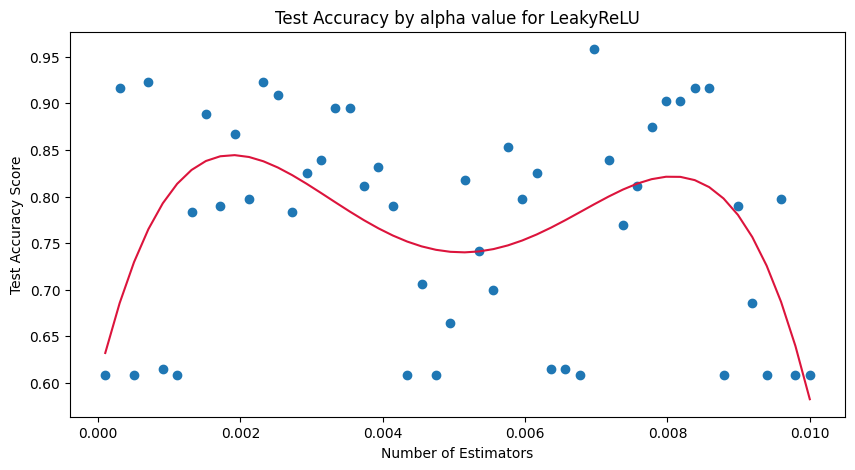

In [116]:
# converts scores and alpha lists in pandas df
df = pd.DataFrame(alpha_scores, columns=['Alpha', 'Accuracy'])
df = df.sort_values(by='Alpha')

y = df['Accuracy'].values
x = df['Alpha'].values

# Creates polynomial regression
poly = PolynomialFeatures(degree=4, include_bias=False)
poly_features = poly.fit_transform(x.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)
y_predicted = poly_reg_model.predict(poly_features)

# Plots points and regression line
plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.plot(x, y_predicted, c="crimson", label='Predicted Value')
plt.title('Test Accuracy by alpha value for LeakyReLU')
plt.xlabel("Number of Estimators")
plt.ylabel('Test Accuracy Score')
plt.show()

In [114]:
best = df['Accuracy'].argmax()

best_alpha = df['Alpha'].iloc[best]
best_accuracy = df['Accuracy'].iloc[best]

print(f"The best alpha is {best_alpha}, achieving accuracy of {best_accuracy:.2%}")

The best alpha is 0.007777551020408164, achieving accuracy of 95.10%


#### From Keras, use “Dropout”. Explain your neural network design. Document your results.

Dropout layers can be used to reduce overfitting by randomly setting some inputs to 0. My neural network design can be seen below. It is a feed-forward neural network with 3 dense layers. The first layer is a fully connected layer with 64 nodes and uses the sigmoid activation function. The input dimension is determined by the number of features in the training data. The second fully connected layer has 16 nodes and uses 'relu' activation. Each hidden layer is followed by a dropout layer with a 0.1 dropout rate. The final dense layer uses a 'sigmoid' activation function with 1 node corresponding to the task of binary classification.

In [121]:
# Dropout model

clear_session()

d=0.1

model = Sequential()
model.add(Dense(64, input_dim=(X_train.shape[1]), activation="sigmoid"))
model.add(Dropout(d))
model.add(Dense(16, activation="relu"))
model.add(Dropout(d))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,041
Trainable params: 3,041
Non-trainable params: 0
_________________________________________________________________


In [122]:
model.compile(loss="binary_crossentropy",
              optimizer=sgd,
	            metrics=["accuracy"])

H8 = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=50, batch_size=128)

_, score = model.evaluate(X_test, y_test, verbose=0)
score

Epoch 1/50
4/4 [==============================] - 1s 76ms/step - loss: 0.6426 - accuracy: 0.6455 - val_loss: 0.6297 - val_accuracy: 0.6084
Epoch 2/50
4/4 [==============================] - 0s 21ms/step - loss: 0.6420 - accuracy: 0.6291 - val_loss: 0.6194 - val_accuracy: 0.6084
Epoch 3/50
4/4 [==============================] - 0s 14ms/step - loss: 0.6147 - accuracy: 0.6620 - val_loss: 0.6166 - val_accuracy: 0.6084
Epoch 4/50
4/4 [==============================] - 0s 18ms/step - loss: 0.6156 - accuracy: 0.6455 - val_loss: 0.6107 - val_accuracy: 0.6084
Epoch 5/50
4/4 [==============================] - 0s 15ms/step - loss: 0.6208 - accuracy: 0.6315 - val_loss: 0.6096 - val_accuracy: 0.6084
Epoch 6/50
4/4 [==============================] - 0s 19ms/step - loss: 0.6225 - accuracy: 0.6432 - val_loss: 0.6021 - val_accuracy: 0.6084
Epoch 7/50
4/4 [==============================] - 0s 19ms/step - loss: 0.6108 - accuracy: 0.6502 - val_loss: 0.5975 - val_accuracy: 0.6084
Epoch 8/50
4/4 [===========

0.6083915829658508

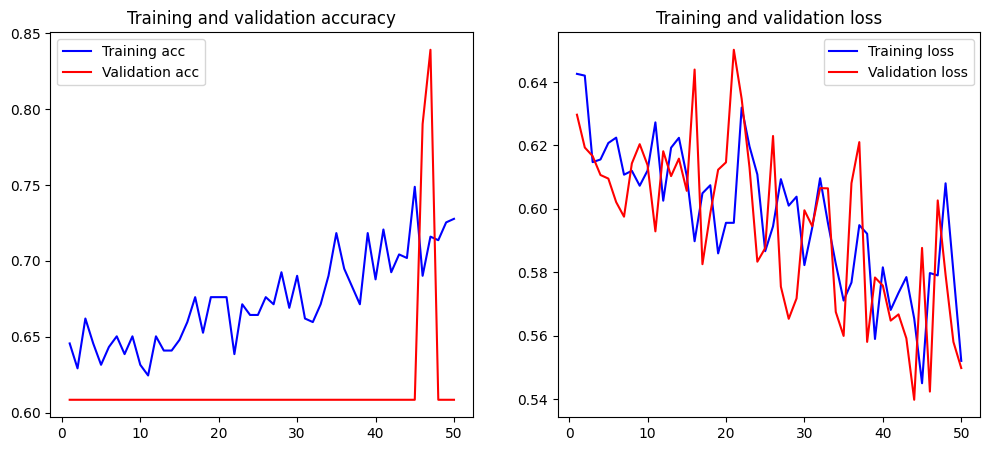

In [123]:
# Plot history
acc = H8.history['accuracy']
val_acc = H8.history['val_accuracy']
loss = H8.history['loss']
val_loss = H8.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

This model performs poorly. Hence, to conclude, the most accurate model is the neural network using learning rate of 0.015, 3 dense layers of size 64, 16 and 1 with LeakyReLU activation layers. This model achieves 95% accuracy on the breast cancer classification dataset included with SciKit-Learn.

## Reference List:

http://powerunit-ju.com/wp-content/uploads/2021/04/Aurelien-Geron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-OReilly-Media-2019.pdf

http://noiselab.ucsd.edu/ECE228/Murphy_Machine_Learning.pdf